### Introduction

Content-based filtering of emotions is a personalized recommendation approach that leverages the emotional content of items to make recommendations to users. Unlike collaborative filtering, which relies on user-item interactions, content-based filtering focuses on the intrinsic features of items and users' emotional preferences. By analyzing the emotional tone, sentiment, and context of content, this method tailors recommendations to match users' emotional states and preferences. It involves techniques such as sentiment analysis, natural language processing, and emotional profiling to understand the emotional resonance of content. Content-based filtering of emotions aims to enhance user satisfaction and engagement by delivering emotionally relevant recommendations tailored to individual preferences.




<div style = "background-color : lightblue;">

## Importing the libraries
</div>

In [1]:
%matplotlib inline
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

In [2]:
import warnings
warnings.filterwarnings('ignore')

<div style = "background-color : lightblue;">
    
## Importing the Dataset
</div>

In [3]:
from datasets import load_dataset
dataset = load_dataset("emotion")

No config specified, defaulting to: emotion/split
Found cached dataset emotion (/Users/rikigodani/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
# displaying the data sets
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
#creating the variables of each dataset

train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [6]:
#creating a function named get_tweets and data is passed as a parameter

def get_tweets(data):

    #creating two empty lists i.e., tweets and labels
    tweets = [x['text'] for x in data]
    labels = [x['label'] for x in data]
    return tweets, labels

For each dictionary, we retrieve the value associated with the key 'text' and append it to tweets list. <br>
For each dictionary, we retrieve the value associated with the key 'label' and append it to label list.

In [7]:
#labeling the emotions by number in a dictionary format

label_to_emotion = {
    0: 'sadness',
    1: 'anger',
    2: 'love',
    3: 'surprise',
    4: 'fear',
    5: 'joy'
}

# Get the tweets and labels from train variable
tweets, labels = get_tweets(train)

# Print the set of integer labels
print(set(labels))

# Convert the integer labels to emotion names
emotions = [label_to_emotion[label] for label in labels]
# Print the set of emotion names
print(label_to_emotion)


{0, 1, 2, 3, 4, 5}
{0: 'sadness', 1: 'anger', 2: 'love', 3: 'surprise', 4: 'fear', 5: 'joy'}


In [8]:
#displaying all the tweets

tweets

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy',
 'ive been feeling a little burdened lately wasnt sure why that was',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
 'i feel as confused about life as a teenager or as jaded as a year old man',
 'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
 'i feel romantic too',
 'i feel like i have to make the suffering i m seeing mean something',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
 'i think it s the easiest time of year to feel dissatisfied',
 'i feel low energy i m just thirst

In [9]:
tweets[10], labels[11]

('i feel like i have to make the suffering i m seeing mean something', 1)

<div style = "background-color : lightblue;">
    
## Tokenizing the Tweets
</div>

The Tokenizer class in the tensorflow.keras.preprocessing.text module is a powerful tool for tokenizing text data in Python. It provides methods to convert text into sequences of tokens, which can then be used for further analysis or modeling.

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [11]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

tokenizer.fit_on_texts(tweets)

print(tokenizer.texts_to_sequences([tweets[10]]))

[[2, 3, 14, 2, 21, 5, 80, 6, 733, 2, 93, 544, 304, 84]]


<div style = "background-color : lightblue;">

##  Padding and Truncating Sequences
</div>
By using the 'get_sequences' function to preprocess the tweet data, as it can convert the raw text data into a format that is suitable for input to a machine learning model.

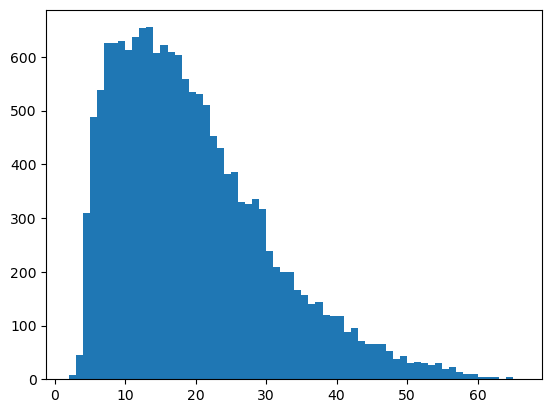

In [12]:
lengths = [len(t.split(' ')) for t in tweets]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [13]:
# The pad_sequences function is part of the tensorflow.keras.preprocessing.sequence module.
# It takes a sequence of sequences as input and returns a new sequence of sequences with padded
# or truncated sequences to a specified length.

from tensorflow.keras.preprocessing.sequence import pad_sequences

Sequences: This is the input sequence of sequences that we want to pad or truncate.

In [14]:
# The tokenizer is an instance of a tokenizer object, and tweets is a list of strings representing the tweets.

def get_sequences(tokenizer, tweets):
    
    # Each tweet is transformed into a sequence of numbers based on the tokenizer's vocabulary.
    sequences = tokenizer.texts_to_sequences(tweets)

    # It takes the sequences as input and performs padding to make all sequences of equal length.
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
    return padded_sequences

In [15]:
padded_train_sequences = get_sequences(tokenizer, tweets)

In [16]:
padded_train_sequences[10]

array([  2,   3,  14,   2,  21,   5,  80,   6, 733,   2,  93, 544, 304,
        84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

##  Preparing the Emotion Labels

In [17]:
classes = set(labels)
print(classes)

{0, 1, 2, 3, 4, 5}


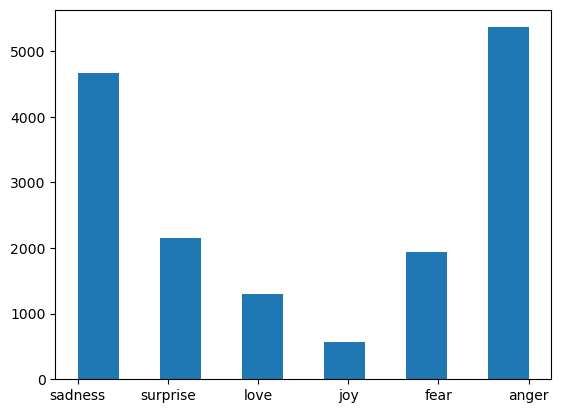

In [18]:

plt.hist(emotions, bins=11)
emotion_names = ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']

# plt.xticks(labels, emotion_names)
plt.show()

In [19]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [20]:
index_to_classes

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [21]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [22]:
train_labels = names_to_ids(labels)
print(train_labels[11])

1


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [24]:
data = pd.DataFrame()
data['tweets'] = tweets
data['emotions'] = labels

label_encoder = LabelEncoder()
label_encoder = LabelEncoder()
encoded_tweet = label_encoder.fit_transform(tweets)
for category, label in zip(tweets, encoded_tweet):
    print(f"{category}: {label}")

data['encoded_tweet'] = encoded_tweet
X = data['tweets']
X.head()

i didnt feel humiliated: 2392
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake: 1638
im grabbing a minute to post i feel greedy wrong: 15052
i am ever feeling nostalgic about the fireplace i will know that it is still on the property: 481
i am feeling grouchy: 632
ive been feeling a little burdened lately wasnt sure why that was: 15587
ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny: 15694
i feel as confused about life as a teenager or as jaded as a year old man: 3556
i have been with petronas for years i feel that petronas has performed well and made a huge profit: 9218
i feel romantic too: 6583
i feel like i have to make the suffering i m seeing mean something: 5253
i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter: 2557
i think it s the easiest time of year to feel dissatisfied: 12437
i feel 

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: tweets, dtype: object

In [25]:
y = data['emotions']
y.head()

0    0
1    0
2    3
3    2
4    3
Name: emotions, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train = X_train.astype(str)
X_test = X_test.astype(str)

cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [28]:
X_train_cv.shape

(12800, 13501)

In [29]:
y_train.shape

(12800,)

In [30]:
rf = RandomForestClassifier(n_estimators=100, random_state=100)
rf.fit(X_train_cv, y_train)

RandomForestClassifier(random_state=100)

In [31]:
y_pred_rf = rf.predict(X_test_cv)

In [32]:
report_rf = classification_report(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
print(accuracy)
print("Classification report of Random Forest classifier:\n", report_rf)

0.870625
Classification report of Random Forest classifier:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       946
           1       0.84      0.93      0.88      1021
           2       0.86      0.70      0.77       296
           3       0.88      0.84      0.86       427
           4       0.85      0.82      0.84       397
           5       0.81      0.73      0.77       113

    accuracy                           0.87      3200
   macro avg       0.86      0.82      0.84      3200
weighted avg       0.87      0.87      0.87      3200



In [33]:
lr = LogisticRegression(max_iter=1000, random_state=100)
lr.fit(X_train_cv, y_train)

LogisticRegression(max_iter=1000, random_state=100)

In [34]:
y_pred_lr = lr.predict(X_test_cv)

In [35]:
nb = MultinomialNB()
nb.fit(X_train_cv, y_train)

MultinomialNB()

In [36]:
y_pred_nb = nb.predict(X_test_cv)

In [37]:
report_nb = classification_report(y_test, y_pred_nb)
accuracy = accuracy_score(y_test, y_pred_nb)
print(accuracy)
print("Classification report of Multinomial Naive Bayes:\n", report_nb)

0.7390625
Classification report of Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83       946
           1       0.69      0.97      0.80      1021
           2       0.92      0.16      0.28       296
           3       0.90      0.56      0.69       427
           4       0.85      0.50      0.63       397
           5       1.00      0.04      0.07       113

    accuracy                           0.74      3200
   macro avg       0.85      0.53      0.55      3200
weighted avg       0.78      0.74      0.70      3200



In [38]:
svm = LinearSVC(random_state=100)
svm.fit(X_train_cv, y_train)

LinearSVC(random_state=100)

In [39]:
y_pred_svm = svm.predict(X_test_cv)

In [40]:
report_svm = classification_report(y_test, y_pred_svm)
accuracy = accuracy_score(y_test, y_pred_svm)
print(accuracy)
print("Classification report of Linear SVM:\n", report_svm)

0.881875
Classification report of Linear SVM:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       946
           1       0.89      0.92      0.91      1021
           2       0.80      0.76      0.78       296
           3       0.88      0.89      0.88       427
           4       0.84      0.84      0.84       397
           5       0.81      0.70      0.75       113

    accuracy                           0.88      3200
   macro avg       0.86      0.84      0.85      3200
weighted avg       0.88      0.88      0.88      3200



In [41]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_train_cv and X_test_cv are sparse matrices
# You need to convert them into iterable collections of text data

# Assuming X_train_text and X_test_text are lists of text data
# If not, adjust accordingly
X_train_text = [' '.join(map(str, row)) for row in X_train_cv]
X_test_text = [' '.join(map(str, row)) for row in X_test_cv]

# Instantiate CountVectorizer without lowercase conversion
cv = CountVectorizer(lowercase=False)
lr = LogisticRegression(max_iter=1000, random_state=100)

# Create pipeline
pipeline = Pipeline([
    ('vectorizer', cv),
    ('classifier', lr)
])

# Fit pipeline
pipeline.fit(X_train_text, y_train)

# Predict and evaluate
y_pred_lr = pipeline.predict(X_test_text)
report_lr = classification_report(y_test, y_pred_lr)
accuracy = accuracy_score(y_test, y_pred_lr)
print(accuracy)
print("Classification report of Logistic Regression (Multi-Class):\n", report_lr)

0.8878125
Classification report of Logistic Regression (Multi-Class):
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       946
           1       0.89      0.93      0.91      1021
           2       0.82      0.76      0.79       296
           3       0.89      0.88      0.88       427
           4       0.86      0.83      0.84       397
           5       0.81      0.68      0.74       113

    accuracy                           0.89      3200
   macro avg       0.87      0.84      0.85      3200
weighted avg       0.89      0.89      0.89      3200



In [42]:
data.shape

(16000, 3)

In [43]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16),  # Removed input_length
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 40)         5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


In [44]:
val_tweets, val_labels = get_tweets(val)
val_sequences = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [45]:
val_tweets[20], val_labels[20]

('i just know to begin with i am going to feel shy about it', 4)

In [46]:
h = model.fit(
    padded_train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=15,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/15


2024-05-05 15:53:33.795940: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


500/500 [==============================] - 6s 10ms/step - loss: 1.3324 - accuracy: 0.4643 - val_loss: 0.8654 - val_accuracy: 0.6940
Epoch 2/15
500/500 [==============================] - 5s 9ms/step - loss: 0.6402 - accuracy: 0.7667 - val_loss: 0.6899 - val_accuracy: 0.7620
Epoch 3/15
500/500 [==============================] - 4s 9ms/step - loss: 0.4218 - accuracy: 0.8523 - val_loss: 0.5002 - val_accuracy: 0.8390
Epoch 4/15
500/500 [==============================] - 5s 9ms/step - loss: 0.2545 - accuracy: 0.9201 - val_loss: 0.4521 - val_accuracy: 0.8550
Epoch 5/15
500/500 [==============================] - 5s 10ms/step - loss: 0.1814 - accuracy: 0.9444 - val_loss: 0.4680 - val_accuracy: 0.8550
Epoch 6/15
500/500 [==============================] - 5s 10ms/step - loss: 0.1483 - accuracy: 0.9529 - val_loss: 0.4625 - val_accuracy: 0.8675
Epoch 7/15
500/500 [==============================] - 5s 10ms/step - loss: 0.1202 - accuracy: 0.9638 - val_loss: 0.4587 - val_accuracy: 0.8675
Epoch 8/15
50

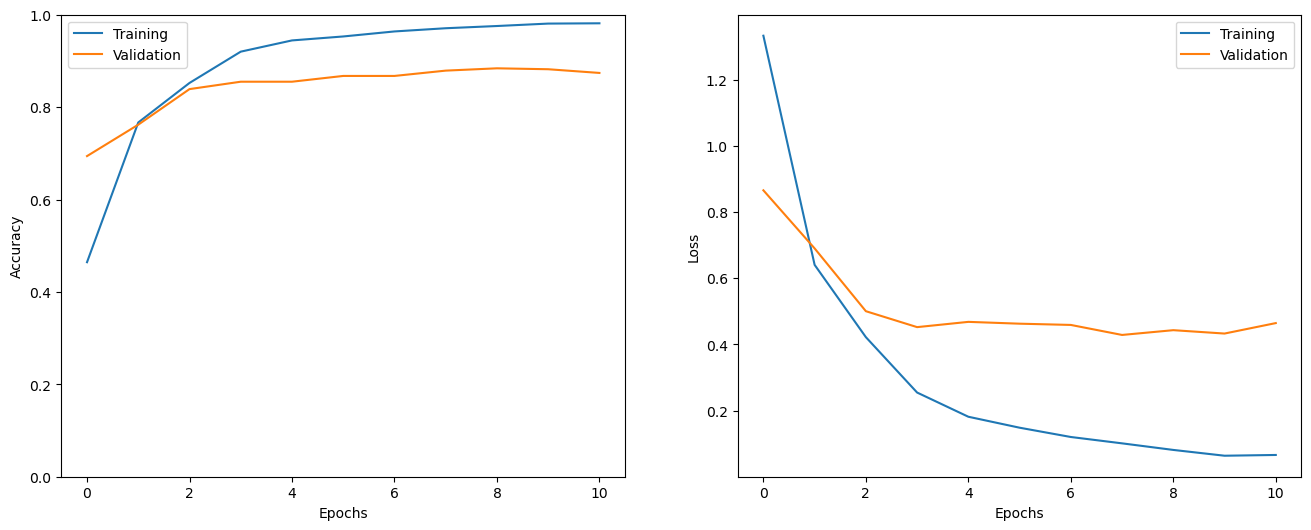

In [47]:
def show_history(h):
    # Extract the number of epochs trained from the history object
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    # Create a figure for plotting
    plt.subplot(1, 2, 1)
    
    # Plot training and validation accuracy across epochs
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.]) # Set y-axis limits to 0 and 1
    plt.xlabel('Epochs') # Set x-axis label
    plt.ylabel('Accuracy') # Set y-axis label
    plt.legend() # Add legend to the plot

    # Plot training and validation loss across epochs
    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

show_history(h)

In [48]:
test_tweets, test_labels = get_tweets(test)
test_sequences = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [49]:
eval = model.evaluate(test_sequences, test_labels)

63/63 [==============================] - 0s 4ms/step - loss: 0.4705 - accuracy: 0.8750


In [50]:
preds = model.predict(test_sequences)
preds_classes = np.argmax(preds, axis=1)
print(preds_classes.shape, test_labels.shape)


63/63 [==============================] - 1s 3ms/step
(2000,) (2000,)


In [51]:
for a in range(0, 5):
    i = random.randint(0, len(test_labels) - 1)

    print('Tweet:', test_tweets[i])
    print('Actual Emotion:', index_to_classes[test_labels[i]])
    l=index_to_classes[test_labels[i]]
    e=label_to_emotion[l]
    print(e)

    prediction = model.predict(np.expand_dims(test_sequences[i], axis=0))[0]
    predicted_class = np.argmax(prediction)

    print('Predicted Emotion:', index_to_classes.get(predicted_class))
    p=index_to_classes.get(predicted_class)
    pr=label_to_emotion[l]
    print(pr,'\n')

Tweet: i enjoy my colleagues i m not feeling very sociable today
Actual Emotion: 1
anger
1/1 [==============================] - 0s 10ms/step
Predicted Emotion: 1
anger 

Tweet: i just cant help but feel like i must protect this innocent being
Actual Emotion: 1
anger
1/1 [==============================] - 0s 10ms/step
Predicted Emotion: 1
anger 

Tweet: i cannot explain why but i need to say please understand my feeling i have heart and im not a heartless person
Actual Emotion: 3
surprise
1/1 [==============================] - 0s 9ms/step
Predicted Emotion: 3
surprise 

Tweet: im feeling slightly irritable today
Actual Emotion: 3
surprise
1/1 [==============================] - 0s 9ms/step
Predicted Emotion: 3
surprise 

Tweet: i feel appalled right now
Actual Emotion: 3
surprise
1/1 [==============================] - 0s 10ms/step
Predicted Emotion: 3
surprise 



### Conclusion

By leveraging natural language processing and sentiment analysis techniques, this method tailors recommendations based on the emotional resonance of content with individual users. It enhances user experience by providing suggestions aligned with their emotional preferences and helps in discovering relevant content that resonates deeply. However, challenges such as accurately capturing and interpreting emotional nuances, as well as addressing privacy concerns related to emotional data, underscore the need for further research and ethical considerations in implementing content-based emotion filtering systems.